## Imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [13]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


## Plot data

Text(0, 0.5, 'Value')

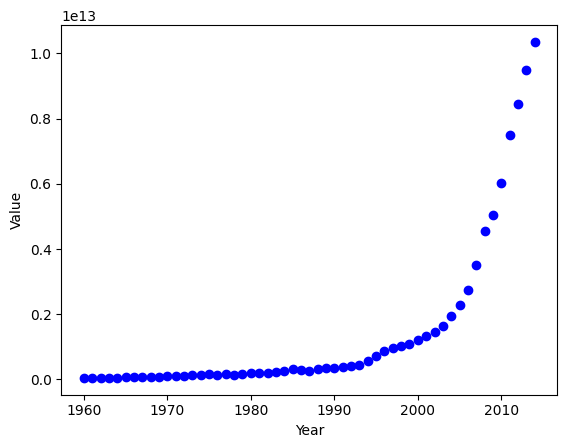

In [14]:
plt.scatter( df.Year, df.Value, color="blue")
plt.xlabel("Year")
plt.ylabel("Value")

## Separate data

In [21]:
train_x = df["Year"].values
train_y = df["Value"].values      

## Function

In [22]:
def sigmoid(x, beta_1, beta_2):
    y = 1 / (1 + np.exp(-beta_1 * (x-beta_2)))
    return y

## Model

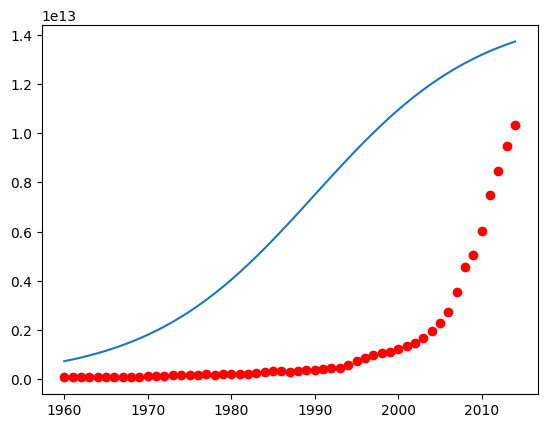

In [23]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(train_x, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(train_x, Y_pred*15000000000000.)
plt.plot(train_x, train_y, 'ro')

## Normalize data

In [24]:
xTrain = train_x / max(train_x)
yTrain = train_y / max(train_y)

## Find the best coefficients

In [25]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xTrain, yTrain)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451709, beta_2 = 0.997207


## Plot result

Text(0.5, 0, 'Year')

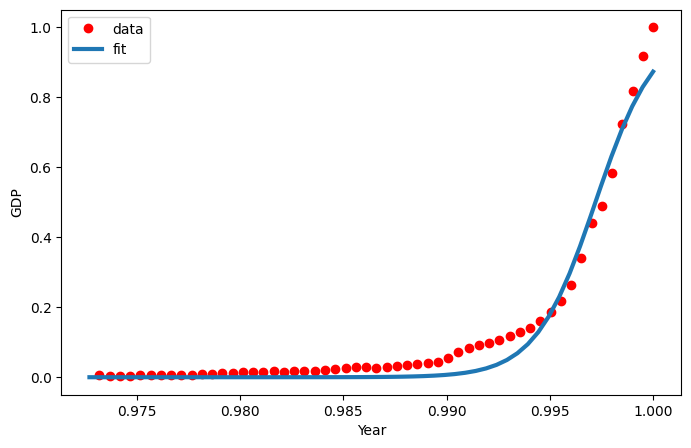

In [26]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xTrain, yTrain, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')